# K-Means Clustering

We have given a collection of 8 points. P1=[0.1,0.6] ,P2=[0.15,0.71], P3=[0.08,0.9] P4=[0.16, 0.85], P5=[0.2,0.3], P6=[0.25,0.5], P7=[0.24,0.1], P8=[0.3,0.2]. Perform the k-mean clustering with initial centroids as m1=P1 = Cluster#1=C1 and m2=P8=cluster#2=C2. Answer the following: <br/>
1] Which cluster does P6 belong to?<br/>
2] What is the population of cluster around m2?  <br/>
3] What is updated value of m1 and m2?<br/>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset = [
           [0.1,0.6],
           [0.15,0.71],
           [0.08,0.9],
           [0.16, 0.85],
           [0.2,0.3],
           [0.25,0.5],
           [0.24,0.1],
           [0.3,0.2]     
]
data = pd.DataFrame(dataset, columns=['X', 'Y'])
data.head()

,X,Y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30


In [10]:
X = np.array(data)
centroids = np.array([
            [0.1, 0.6],
            [0.3, 0.2]
])
centroids

array([[0.1, 0.6],
       [0.3, 0.2]])

In [11]:
class K_Means:
  def __init__(self, k = 2, tol = 0.01, max_iter = 300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.cur_centroid = []

  def fit(self, data, centroid):
    self.cur_centroid = centroid
    new_centroids = []

    for _ in range(self.max_iter):
      cur_clusters = [[] for _ in range(self.k)]

      for pt in data:
        distances = [np.linalg.norm(pt - c) for c in self.cur_centroid]
        closest_centroid = distances.index(min(distances))
        cur_clusters[closest_centroid].append(pt)

      new_centroids = [
        np.average(cur_clusters[i], axis=0) for i in range(self.k)
      ]

      optimized = True

      for i in range(len(self.cur_centroid)):
        if np.sum(
          (new_centroids[i] - self.cur_centroid[i])/self.cur_centroid[i] * 100.0
        ) > self.tol:
          optimized = False
      
      if optimized == True: break

      self.cur_centroid = new_centroids
    
    return cur_clusters, self.cur_centroid


In [12]:
km = K_Means()
clusters, centroids = km.fit(X, centroids)

## Before Clustering

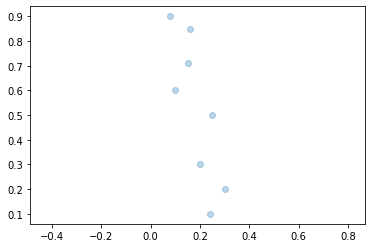

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.axis("equal")
plt.show()

## After Clustering

Clusters are: 
[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]
[[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]

1. P6 [0.25, 0.5] belongs to cluster: 1
2. Population around cluster m2: 3
3. Updated values of centroids:
[0.148 0.712]
[0.24666667 0.2       ]


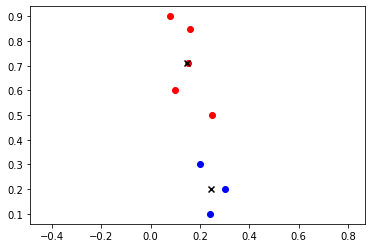

In [14]:
colors = ['r', 'b']
plt.figure()

p6 = [0.25, 0.5]
p6c = -1

print("Clusters are: ")
for i,c in enumerate(clusters):
  pts = []
  for x,y in c:
    if p6 == [x,y]: p6c = i+1
    pts.append([x,y])
    plt.scatter(x,y, color = colors[i])
  print(pts)

print("\n1. P6", p6, "belongs to cluster:", p6c)
print("2. Population around cluster m2:", len(clusters[1]))
print("3. Updated values of centroids:")
for centroid in centroids:
  print(centroid)
  plt.scatter(
      centroid[0],
      centroid[1],
      marker = 'x',
      color = 'black'
  )

plt.axis("equal")
plt.show()